# Data Visualization
```{tip}
A lot of these examples come from Cole Nussbaumer Knaflic's great book: 
Storytelling with Data: A Data Visualization Guide for Business Professionals
```

## Gestalt's Six Principles of Visual Perception 
Define how people interact with and create order out of visual stimuli. 

### Perceptual grouping
#### Proximity
We perceive objects that are physically close together as belonging to part of a group.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams['figure.figsize'] = (12, 4)
rng = np.random.default_rng(42)

In [ ]:
group_size = 5
group0 = rng.integers(low=0, high=5, size=(group_size,2))
group1 = rng.integers(low=[[10], [5]], high=[[15], [10]], size=(2, group_size)).T
group2 = rng.integers(low=[[0], [10]], high=[[5], [15]], size=(2, group_size)).T
df = pd.DataFrame(np.concatenate([group0, group1, group2]), columns=['x', 'y'])
df['group'] = df.index // group_size

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

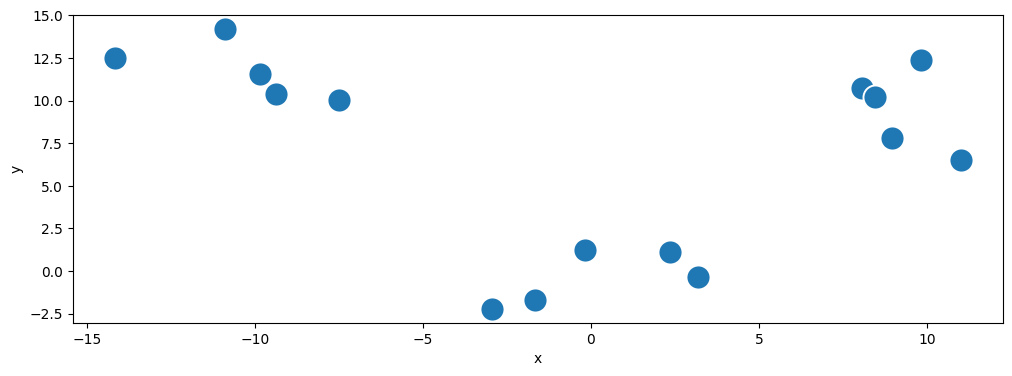

In [121]:
group_size = 5
group0 = rng.normal(loc=0, scale=2.0, size=(group_size, 2))
group1 = rng.normal(loc=10, scale=2.0, size=(2, group_size)).T
group2 = rng.normal(loc=10, scale=2.0, size=(2, group_size)).T
df = pd.DataFrame(np.concatenate([group0, group1, group2]), columns=['x', 'y'])
df['group'] = df.index // group_size
df.loc[df.group==1, 'x'] -= 20
# df.loc[df.group==2, 'y'] -= 5

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Similarity
Objects that are of similar color, shape, size, or orientation are perceived as related or belonging to part of a group.

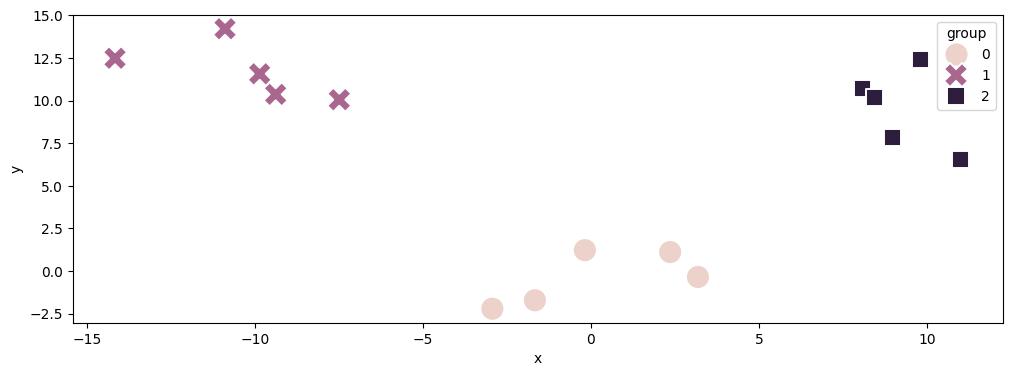

In [122]:
sns.scatterplot(data=df, x='x', y='y', hue="group", style="group", s=300)
plt.show()

### Enclosure
objects that are physically enclosed together as belonging to part of a group.

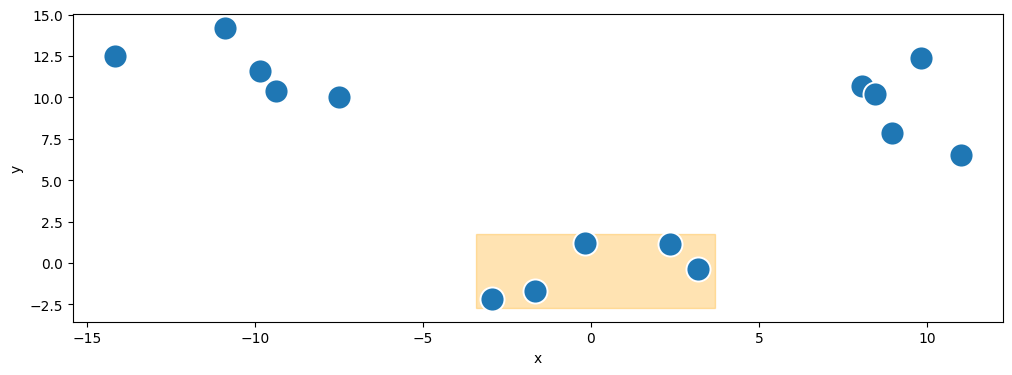

In [123]:
x_min = df.loc[df.group==0, 'x'].min() - 0.5
x_max = df.loc[df.group==0, 'x'].max() + 0.5
y_min = df.loc[df.group==0, 'y'].min() - 0.5
y_max = df.loc[df.group==0, 'y'].max() + 0.5
highlight = plt.Rectangle((x_min, y_min), 
                          x_max-x_min, 
                          y_max-y_min, 
                          color='orange', 
                          alpha=0.3)
plt.gca().add_patch(highlight)
sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Closure
People like things to be simple and to fit in the constructs that are already in our heads

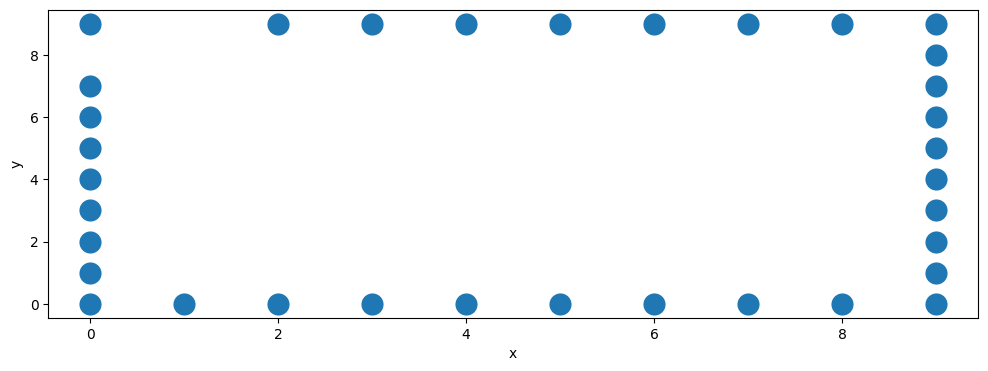

In [126]:
edge_points = 20
left = rng.integers(low=[[0], [0]], high=[[1], [10]], size=(2, edge_points)).T
right = rng.integers(low=[[9], [0]], high=[[10], [10]], size=(2, edge_points)).T
top = rng.integers(low=[[0], [9]], high=[[10], [10]], size=(2, edge_points)).T
bottom = rng.integers(low=[[0], [0]], high=[[10], [1]], size=(2, edge_points)).T
df = pd.DataFrame(np.concatenate([left, right, top, bottom]), columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Continuity
Our eyes seek the smoothest path and naturally create continuity in what we see even where it may not explicitly exist

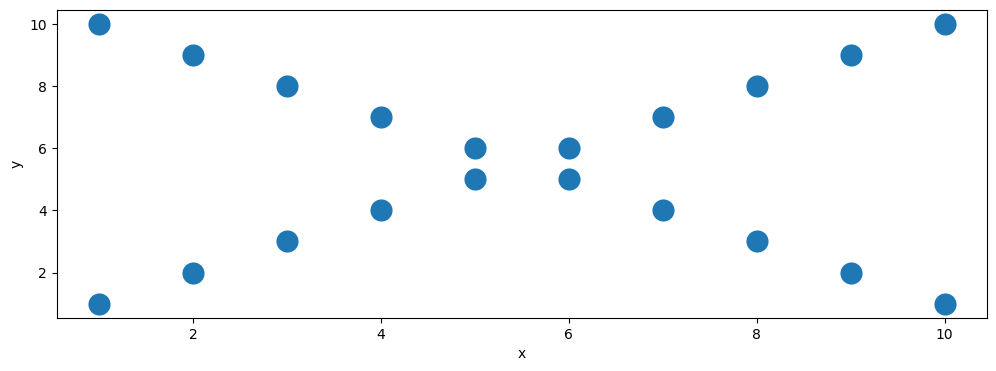

In [127]:
count = np.arange(10, 0, -1)
line0 = np.concatenate([count.reshape(1,-1), count.reshape(1,-1)]).T
line1 = np.concatenate([count.reshape(1,-1), np.sort(count, axis=0).reshape(1,-1)]).T
df = pd.DataFrame(np.concatenate([line0, line1]), columns=['x', 'y'])

sns.scatterplot(data=df, x='x', y='y', s=300)
plt.show()

### Connection
objects that are physically connected are thought of as part of a group

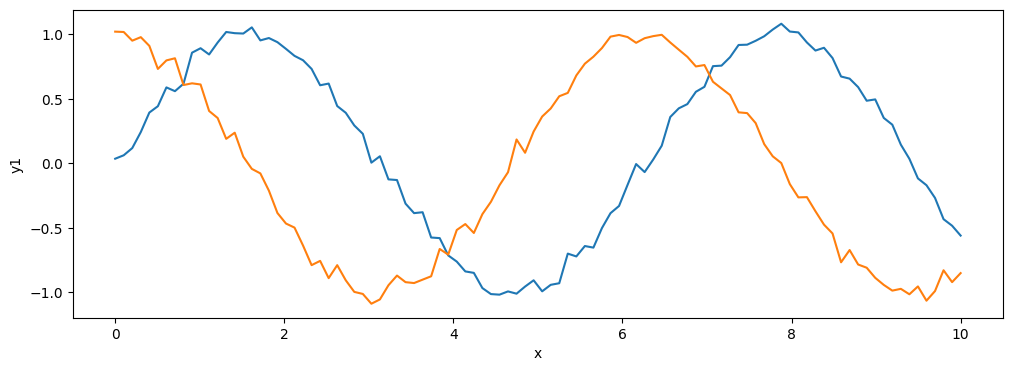

In [128]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + rng.normal(0, 0.05, len(x))
y2 = np.cos(x) + rng.normal(0, 0.05, len(x))
df = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2})
sns.lineplot(data=df, x='x', y='y1', markers=True, dashes=False, errorbar=None)
sns.lineplot(data=df, x='x', y='y2', markers=True, dashes=False, errorbar=None)
plt.show()

## Plot examples

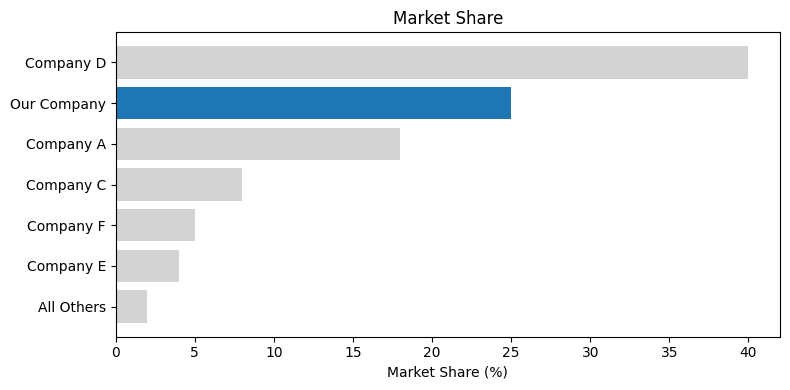

In [129]:
companies = ['Company D', 'Our Company', 'Company A', 'Company C', 'Company F', 'Company E', 'All Others']
market_share = [40, 25, 18, 8, 5, 4, 2]
colors = ['lightgray', 'tab:blue', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

plt.figure(figsize=(8, 4))
plt.barh(companies, market_share, color=colors)
plt.xlabel('Market Share (%)')
plt.title('Market Share')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

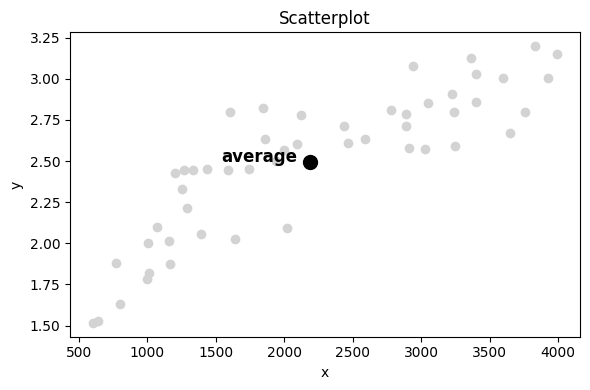

In [130]:
x = rng.uniform(500, 4000, 50)
y = 3 - 2 * np.exp(-x / 1500) + rng.normal(0, 0.2, 50)  # simulated trend with noise

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='lightgray', label='Data')
plt.scatter(np.mean(x), np.mean(y), color='black', s=100, label='Average')
plt.text(np.mean(x) - 650, np.mean(y), 'average', color='black', fontsize=12, weight='bold')
plt.title('Scatterplot')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

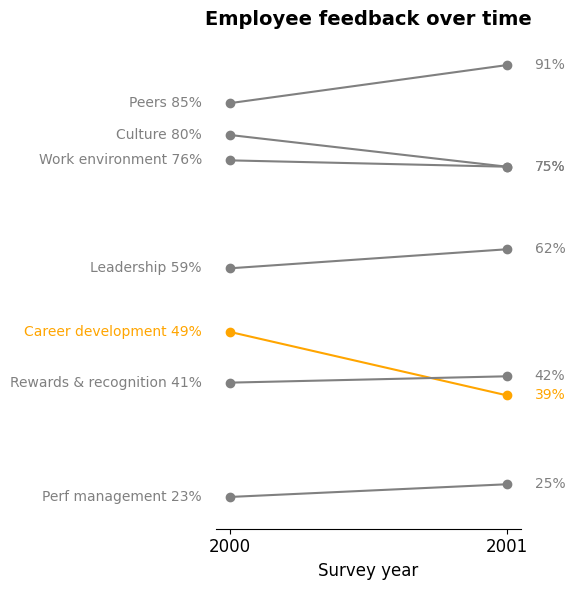

In [131]:
categories = ['Peers', 'Culture', 'Work environment', 'Leadership', 'Career development', 'Rewards & recognition', 'Perf management']
start_vals = [85, 80, 76, 59, 49, 41, 23]
end_vals = [91, 75, 75, 62, 39, 42, 25]
dates = [2000, 2001]
colors = ['gray', 'gray', 'gray', 'gray', 'orange', 'gray', 'gray']

fig, ax = plt.subplots(figsize=(6, 6))

for i, category in enumerate(categories):
    ax.plot(dates, [start_vals[i], end_vals[i]], marker='o', color=colors[i])
    ax.text(dates[0]-0.1, start_vals[i], f'{category} {start_vals[i]}%', va='center', ha='right', color=colors[i])
    ax.text(dates[1]+0.1, end_vals[i], f'{end_vals[i]}%', va='center', color=colors[i])

plt.title('Employee feedback over time', fontsize=14, weight='bold')
plt.xticks(dates, [str(date) for date in dates], fontsize=12)
plt.ylim(min(start_vals+end_vals)-5, max(start_vals+end_vals)+5)
ax.set_xlabel('Survey year', fontsize=12)
ax.set_ylabel('Percent favorable', fontsize=12)

# Hide the y-axis and spines for cleaner look
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

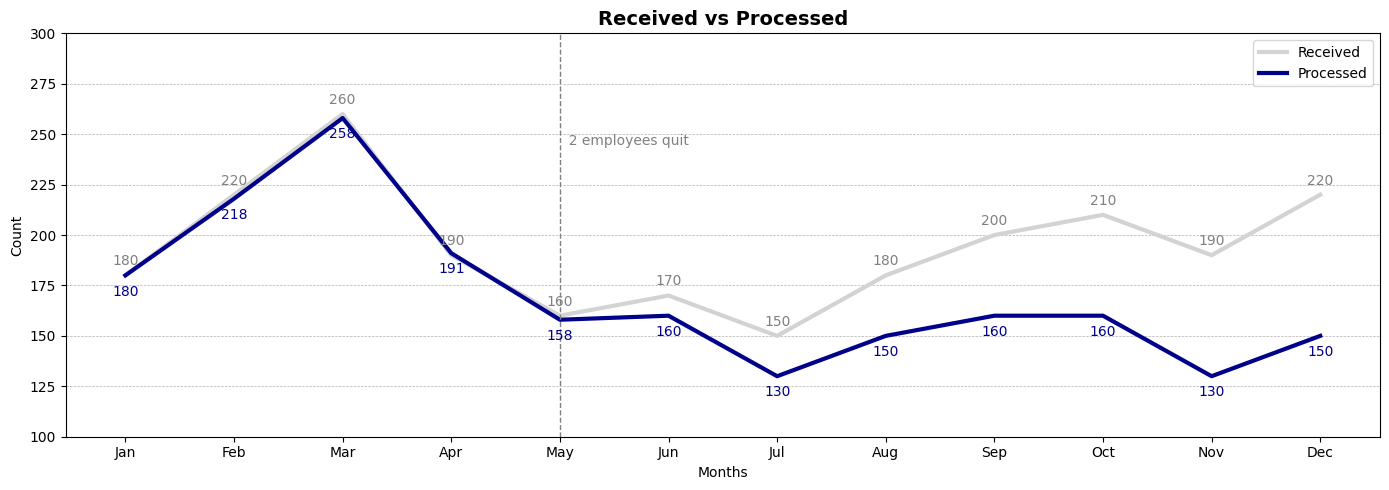

In [134]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [180, 220, 260, 190, 160, 170, 150, 180, 200, 210, 190, 220]
processed = [v-(10*(i-4)) if i > 4 else v+rng.integers(low=-2, high=2) for i, v in enumerate(received)]

plt.figure(figsize=(14, 5))

# Plot received data in gray and processed data in blue
plt.plot(months, received, color='lightgray', linewidth=3, label='Received')
plt.plot(months, processed, color='darkblue', linewidth=3, label='Processed')

# Annotate values on the plot
for i, (r, p) in enumerate(zip(received, processed)):
    plt.text(months[i], r + 5, str(r), color='gray', fontsize=10, ha='center')
    plt.text(months[i], p - 10, str(p), color='darkblue', fontsize=10, ha='center')


# Add title and labels
plt.title('Received vs Processed', fontsize=14, weight='bold')
plt.xlabel('Months')
plt.ylabel('Count')

plt.axvline(x='May', color='gray', linestyle='--', linewidth=1)
plt.text('May', 250, '  2 employees quit',
         color='gray', fontsize=10, va='top', ha='left')

plt.legend(loc='upper right')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.ylim(100, 300)
plt.tight_layout()
plt.show()


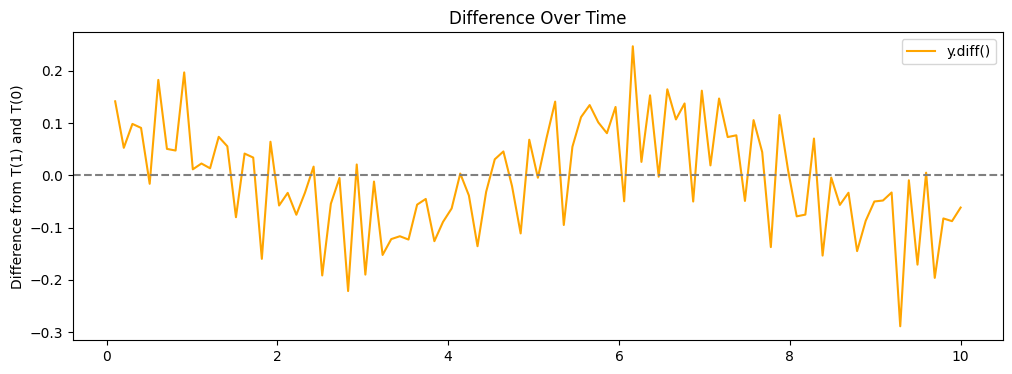

In [133]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + rng.normal(0, 0.05, len(x))
df = pd.DataFrame({'x': x, 'y': y})

plt.plot(df['x'], df['y'].diff(), color='orange', label='y.diff()')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Difference Over Time')
plt.ylabel('Difference from T(1) and T(0)')
plt.legend()
plt.show()

In [98]:
# categories = ['A', 'B', 'C', 'D', 'E']
# values = [1, 6, 3, 5, 7]

# fig, axs = plt.subplots(1, 3, sharey=True)

# axs[0].bar(categories, values, width=0.2)
# axs[0].set_title('Too thin')
# axs[0].set_ylim(0, 8)
# axs[1].bar(categories, values, width=0.95)
# axs[1].set_title('Too thick')
# axs[2].bar(categories, values, width=0.7)
# axs[2].set_title('Just right')

# # Set common y-axis label
# for ax in axs:
#     ax.set_ylim(0, 8)

# plt.tight_layout()
# plt.show()